# Project: Communicate Data Findings
## by Bertrand B

## Preliminary Wrangling

> In this notebook we will explore the ford bike dataset.

In [92]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [93]:
df=pd.read_csv('2017-fordgobike-tripdata.csv')

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
dtypes: float64(4), int64(4), object(5)
memory usage: 51.5+ MB


## Assessing data

In [95]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber


### In this data It seems that the data have no issues at all. There is no NaN values or wrong types.

In [96]:
# Just some data cleaining.
df=df[df['bike_id'].duplicated()==False]

### What is the structure of your dataset?

> The dataset is composed of datas about trip registered by a ford bike under bike id. The trip is composed of the duration, the start and end station, the start and end position, the start time and the end time.

### What is/are the main feature(s) of interest in your dataset?

> The main feature of interet in the dataset are the position, the stations, and the duration of the trip.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> To have the position of the bike we will use the longitude and latitude. We will also used the start station and end station and the duration of the trip. There is no NaN values as we see on the .info() function.

## Univariate Exploration



In [97]:
df.start_time=pd.to_datetime(df.start_time)

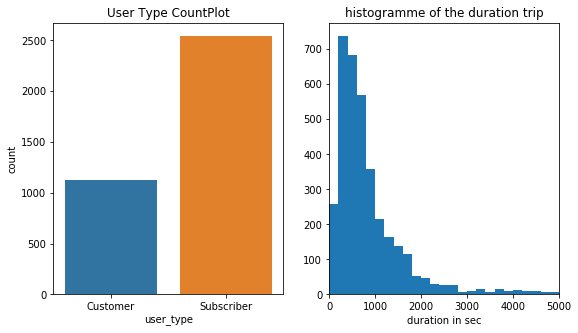

In [98]:
plt.figure(figsize=[14,5])
plt.subplot(1,3,1)
sb.countplot(data=df,x='user_type')
plt.title('User Type CountPlot')

plt.subplot(1,3,2)
bins=np.arange(0, df.duration_sec.max()+200,200)
plt.hist(data=df,x='duration_sec',bins=bins);
plt.xlim([0,5000])
plt.xlabel('duration in sec')
plt.title('histogramme of the duration trip');

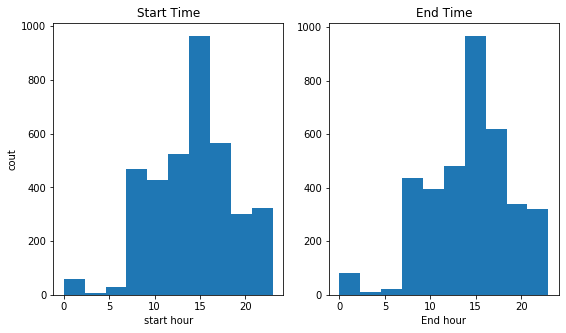

In [99]:
plt.figure(figsize=[14,5])
plt.subplot(1,3,1)
df_hour_e=pd.DataFrame()
df_hour_e['hour']=df.start_time.dt.hour
plt.hist(data=df_hour_e,x='hour');
plt.xlabel('start hour')
plt.ylabel('cout')
plt.title('Start Time')

plt.subplot(1,3,2)
df_hour_s=pd.DataFrame()
df.end_time=pd.to_datetime(df.end_time)
df_hour_s['hour']=df.end_time.dt.hour
plt.hist(data=df_hour_s,x='hour');
plt.xlabel('End hour')
plt.title('End Time');

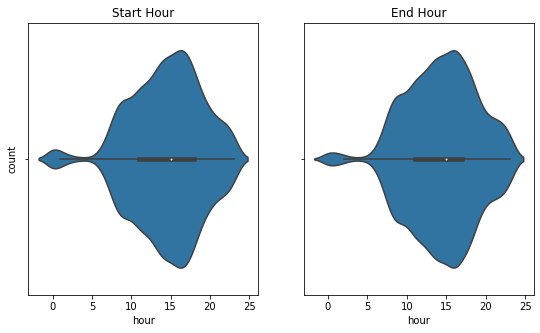

In [123]:
plt.figure(figsize=[14,5])
plt.subplot(1,3,1)
sb.violinplot(data=df_hour_s,x='hour')
plt.ylabel('count')
plt.title('Start Hour')

plt.subplot(1,3,2)
sb.violinplot(data=df_hour_e,x='hour',bins=np.arange(0,24,1));
plt.title('End Hour');

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I did a transformation of the types of the start and end hour to the datetime type. I did not erase outliers.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I have checked for duplicates and there were no duplicates. The form of the dataset is good and ready to work with.

## Bivariate Exploration

>

In [101]:
df.start_station_latitude.value_counts()

37.828410    69
37.804770    60
37.783899    54
37.786375    50
37.804562    49
             ..
37.323678     1
37.808750     1
37.836182     1
37.858868     1
37.344882     1
Name: start_station_latitude, Length: 266, dtype: int64

In [102]:
df.end_station_longitude.value_counts()

-122.394203    76
-122.403234    57
-122.404904    55
-122.268247    53
-122.395282    50
               ..
-122.266438     2
-122.261578     2
-122.213037     1
-122.270582     1
-121.896966     1
Name: end_station_longitude, Length: 270, dtype: int64

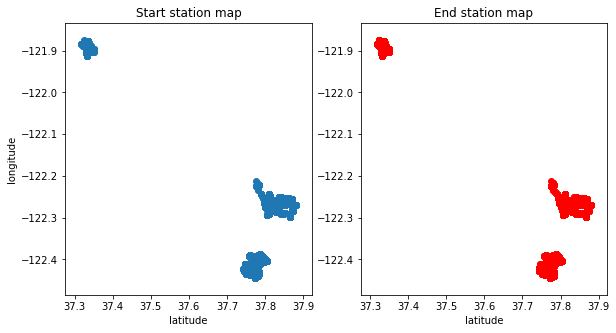

In [103]:
plt.figure(figsize=[15,5])
plt.subplot(1,3,1)
plt.scatter(data=df,x='start_station_latitude',y='start_station_longitude',color=sb.color_palette()[0]);
plt.title('Start station map')
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.subplot(1,3,2)
plt.title('End station map')
plt.xlabel('latitude')
plt.scatter(data=df,x='end_station_latitude',y='end_station_longitude',color='r');

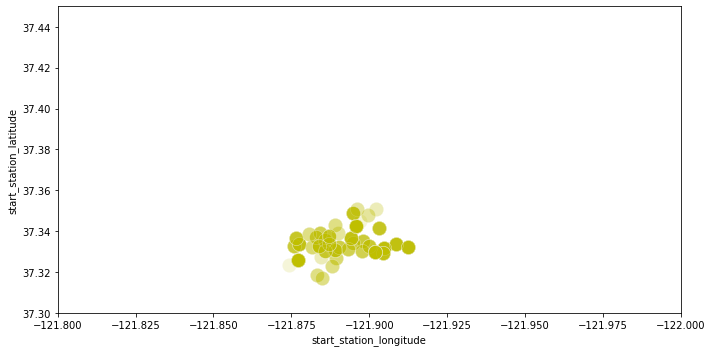

In [104]:
axes, figure = plt.subplots(figsize = (10,5))

sb.scatterplot(data = df, x = "start_station_longitude", y = "start_station_latitude", alpha = 0.15, s = 200, color='y')
plt.xlim(-121.8,-122)#to have just the one on the top left.
plt.ylim(37.3,37.45)
plt.tight_layout()

In [105]:
df['hour_start']=df_hour_e.hour
#https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude/43211266#43211266
import geopy.distance
def distance(col):
    coords_1 = (col[0], col[1])
    coords_2 = (col[2], col[3])
    
    return geopy.distance.distance(coords_1, coords_2).m

df['distance_m']=df[['end_station_latitude','end_station_longitude',
                     'start_station_latitude','end_station_longitude']].apply(distance, axis=1)

df.distance_m

0          258.931741
1         2071.324230
2            0.000000
3         1040.991924
4          113.591245
             ...     
515369       0.000000
515516    1212.456140
515956     694.778368
516259     259.211832
516988     831.335434
Name: distance_m, Length: 3673, dtype: float64

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3673 entries, 0 to 516988
Data columns (total 15 columns):
duration_sec               3673 non-null int64
start_time                 3673 non-null datetime64[ns]
end_time                   3673 non-null datetime64[ns]
start_station_id           3673 non-null int64
start_station_name         3673 non-null object
start_station_latitude     3673 non-null float64
start_station_longitude    3673 non-null float64
end_station_id             3673 non-null int64
end_station_name           3673 non-null object
end_station_latitude       3673 non-null float64
end_station_longitude      3673 non-null float64
bike_id                    3673 non-null int64
user_type                  3673 non-null object
hour_start                 3673 non-null int64
distance_m                 3673 non-null float64
dtypes: datetime64[ns](2), float64(5), int64(5), object(3)
memory usage: 619.1+ KB


In [107]:
df.distance_m.value_counts()

0.000000       287
1040.889512     23
386.131255      19
13.171079       17
406.866675      14
              ... 
1132.932631      1
683.949612       1
1371.421730      1
1631.810151      1
1282.994195      1
Name: distance_m, Length: 2029, dtype: int64

In [108]:
df=df[df['distance_m']!=0]

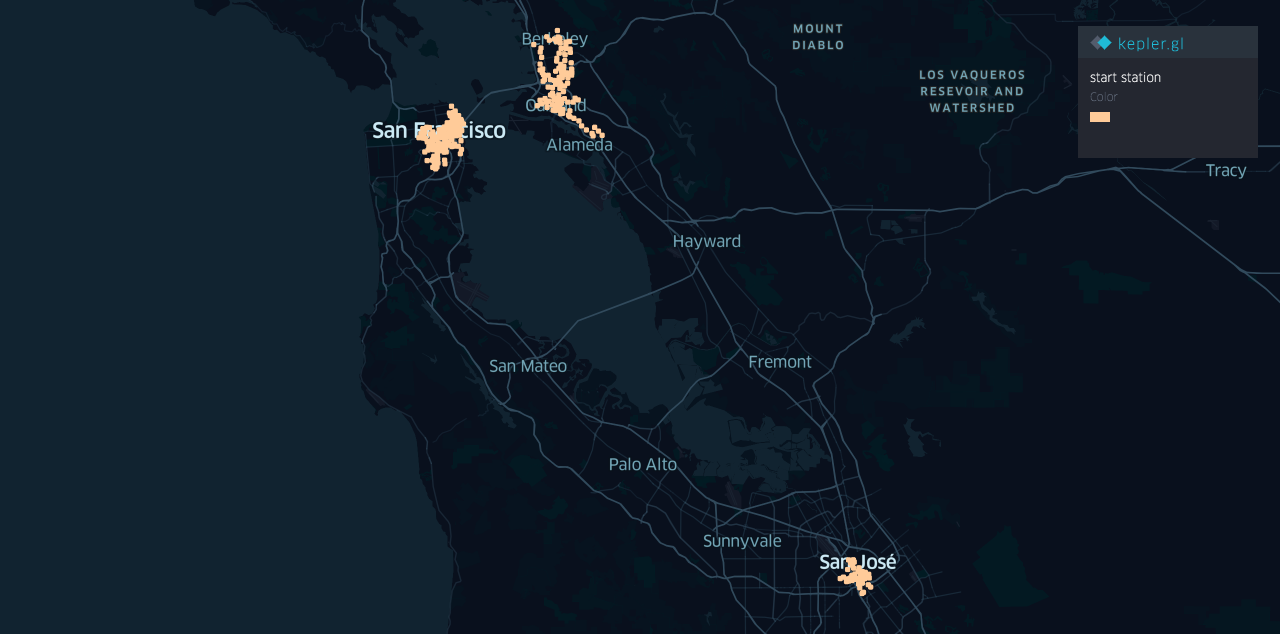

In [109]:
from IPython.display import Image
Image("kepler-gl.png")

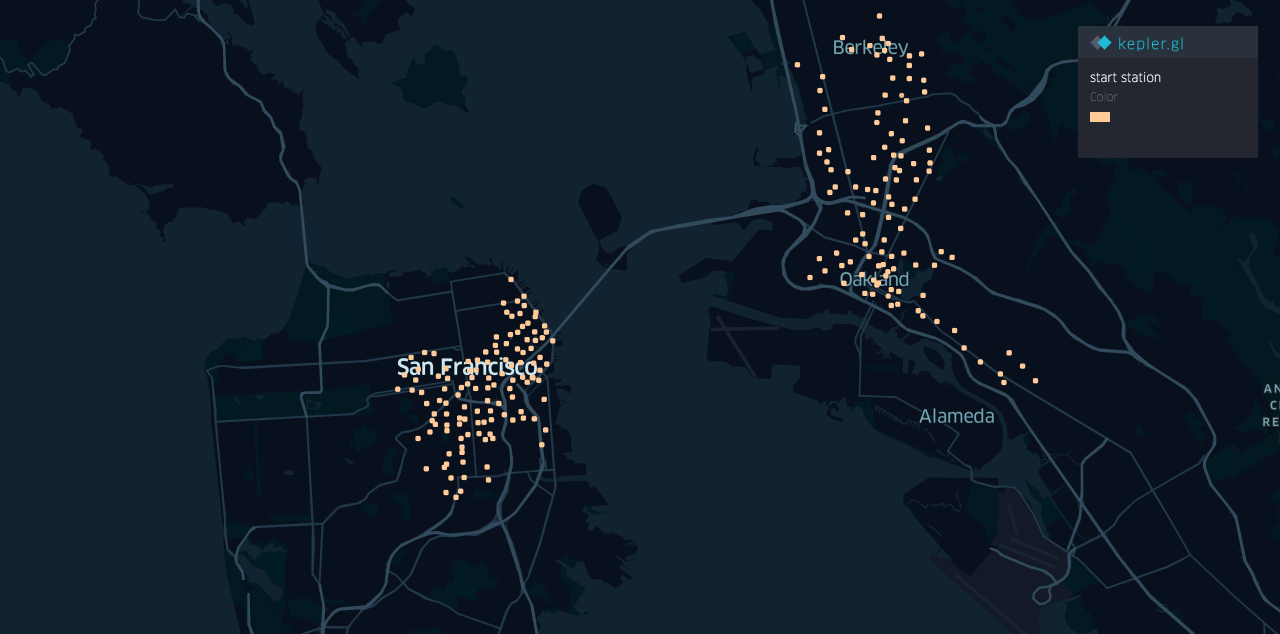

In [110]:
Image("kepler-gl (1).png")

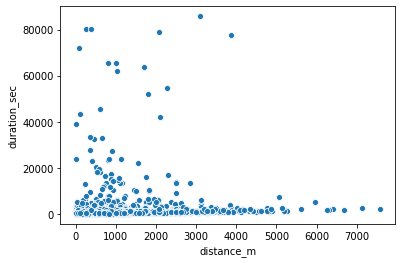

In [111]:
sb.scatterplot(data=df,x='distance_m',y='duration_sec')

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Le longitude and latitude goes in pair.  We saw that each position result of one of the three main cities of the map. There 3 main positions.
> The distance is not so much related with the duration because biker can stay in the same area.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The interesting part is that there are three main positions in the map. We will identify those three positions later.

## Multivariate Exploration



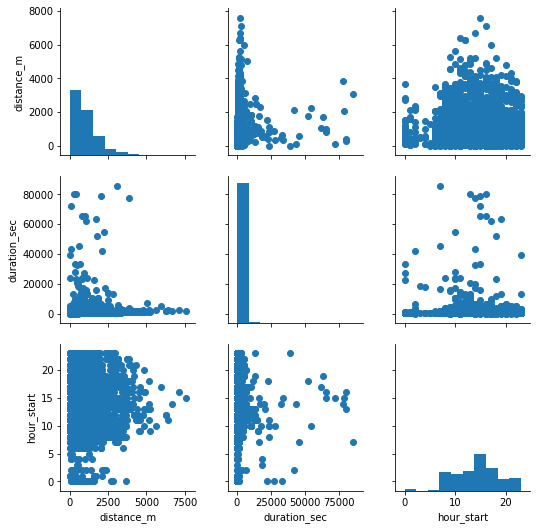

In [112]:
g = sb.PairGrid(df[['distance_m','duration_sec','hour_start']])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

In [113]:
df.head(0)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,hour_start,distance_m


In [114]:
#Now I create the label variable.
#I use a classification algorithm I found on the web.
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3).fit(df[["start_station_longitude", "start_station_latitude"]])

df['label'] = kmeans.labels_
df.label.value_counts()

1    1890
2    1112
0     384
Name: label, dtype: int64

In [115]:
df.label.value_counts()

1    1890
2    1112
0     384
Name: label, dtype: int64

In [121]:
df=df.reset_index()
for i in range(0,df.shape[0]):
    x=df.label[i]
    if x==1:
        df.label[i]='San José'
    if x==2:
        df.label[i]='Oakland'
    if x==0:
        df.label[i]='San Fransisco';
#The algo is very slow because I couldn't use the iterators or the apply() method
        

In [117]:
df.label.value_counts()

San José         1890
Oakland          1112
San Fransisco     384
Name: label, dtype: int64

In [118]:
df.head(0)

,index,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,hour_start,distance_m,label


(-8000, 30000)

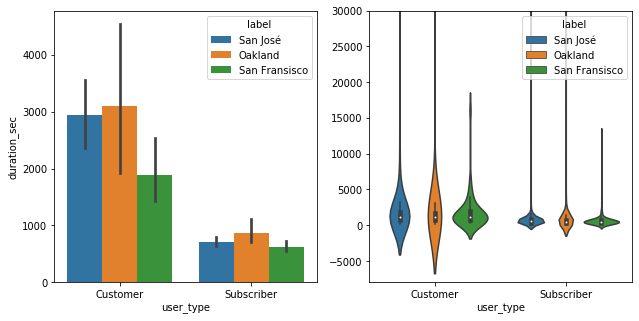

In [119]:
plt.figure(figsize=[16,5])
plt.subplot(1,3,1)
sb.barplot(data=df,x='user_type',y='duration_sec',hue='label');
plt.subplot(1,3,2)
sb.violinplot(data=df,x='user_type',y='duration_sec',hue='label');
plt.ylabel('')
plt.ylim([-8000,30000])

(-8000, 30000)

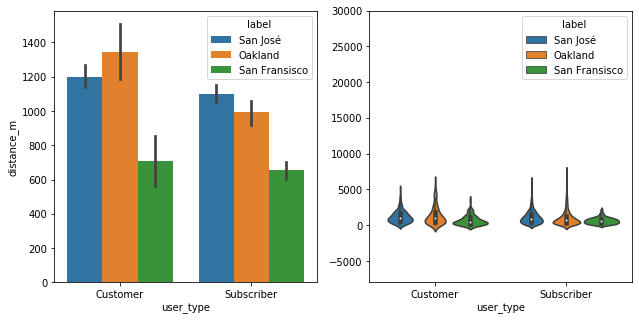

In [120]:
plt.figure(figsize=[16,5])
plt.subplot(1,3,1)
sb.barplot(data=df,x='user_type',y='distance_m',hue='label');
plt.subplot(1,3,2)
sb.violinplot(data=df,x='user_type',y='distance_m',hue='label');
plt.ylabel('')
plt.ylim([-8000,30000])

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> There are some tends between the duration and the hour start. Long trips seems to start early in the morning (before 3am) or in the afternoon (around 3pm).

> Between the duration and the start hour: At 3pm and ealy in the morning the trips are much longer. 

> Customer tends to have much longer traject (around 2800 sec) while the Subscribers are around 800 sec. There is a huge difference between those two.

> And in the three positions Oakland is the start station by wich start the longer trajects (3200 sec). Then follow san fransisco with 2900 sec and then San josé (2000 sec).

### Were there any interesting or surprising interactions between features?

> We didn't expected a difference between cities in the duration and the distance of trips. 
> As well I didn't expected the difference between the Customers and Subscribers in the distance and duration.